In [3]:
# 1. Install opendatasets
!pip install -q opendatasets

# 2. Import and download dataset
import opendatasets as od

od.download("https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies")

Dataset URL: https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies


100%|██████████| 221M/221M [00:01<00:00, 228MB/s]


In [4]:
# 3. Load the CSV into pandas
import pandas as pd

df = pd.read_csv("/content/tmdb-movies-dataset-2023-930k-movies/TMDB_movie_dataset_v11.csv")

print(f"Loaded {len(df):,} movies")
print("\n Sample data:")
print(df[['title', 'genres', 'overview']].head(3))

Loaded 1,268,756 movies

 Sample data:
             title                              genres  \
0        Inception  Action, Science Fiction, Adventure   
1     Interstellar   Adventure, Drama, Science Fiction   
2  The Dark Knight      Drama, Action, Crime, Thriller   

                                            overview  
0  Cobb, a skilled thief who commits corporate es...  
1  The adventures of a group of explorers who mak...  
2  Batman raises the stakes in his war on crime. ...  


In [5]:
df.sample(4)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
572503,1367555,Mother Bhumi,0.0,0,In Production,NaN,0,0,False,NaN,...,Ibu Bhumi,In a community of farmers living on the Malays...,1.400,NaN,NaN,Drama,"Janji Pictures, Volos Films","Italy, Malaysia",Malay,black magic
1235322,837612,A Lady in Love,0.0,0,Released,1920-05-30,0,0,False,NaN,...,A Lady in Love,NaN,0.884,NaN,NaN,NaN,NaN,United States of America,NaN,NaN
484058,1043153,Down To Fuck 2,0.0,0,Released,2016-04-12,0,144,True,NaN,...,Down To Fuck 2,"When you have girls that are down to fuck, you...",0.846,/hNq1dZyqGQWhZh2H93jHeXEDxNI.jpg,NaN,NaN,Desire Films,NaN,NaN,NaN
757772,1329313,Alma,0.0,0,Released,NaN,0,0,False,NaN,...,Alma,NaN,0.650,/8dzWxFnCmuVptWfbXmQh8AQLFxQ.jpg,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

,0
id,0
title,13
vote_average,0
vote_count,0
status,0
release_date,245022
revenue,0
runtime,0
adult,0
backdrop_path,941974


In [7]:
df.shape

(1268756, 24)

In [8]:
# Install only if needed
!pip install -q opendatasets pandas matplotlib seaborn wordcloud

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import ast
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [9]:
print("\n📋 First 3 Rows:")
print(df[['title', 'genres', 'overview', 'vote_average', 'popularity']].head(3))

print("\n📝 Data Info:")
print(df.info())



📋 First 3 Rows:
             title                              genres  \
0        Inception  Action, Science Fiction, Adventure   
1     Interstellar   Adventure, Drama, Science Fiction   
2  The Dark Knight      Drama, Action, Crime, Thriller   

                                            overview  vote_average  popularity  
0  Cobb, a skilled thief who commits corporate es...         8.364      83.952  
1  The adventures of a group of explorers who mak...         8.417     140.241  
2  Batman raises the stakes in his war on crime. ...         8.512     130.643  

📝 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268756 entries, 0 to 1268755
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1268756 non-null  int64  
 1   title                 1268743 non-null  object 
 2   vote_average          1268756 non-null  float64
 3   vote_count            1268756

In [10]:
df.memory_usage(deep=True)

,0
Index,132
id,10150048
title,103198253
vote_average,10150048
vote_count,10150048
status,82617392
release_date,76430882
revenue,10150048
runtime,10150048
adult,1268756


In [11]:
missing = df.isna().sum().sort_values(ascending=False)


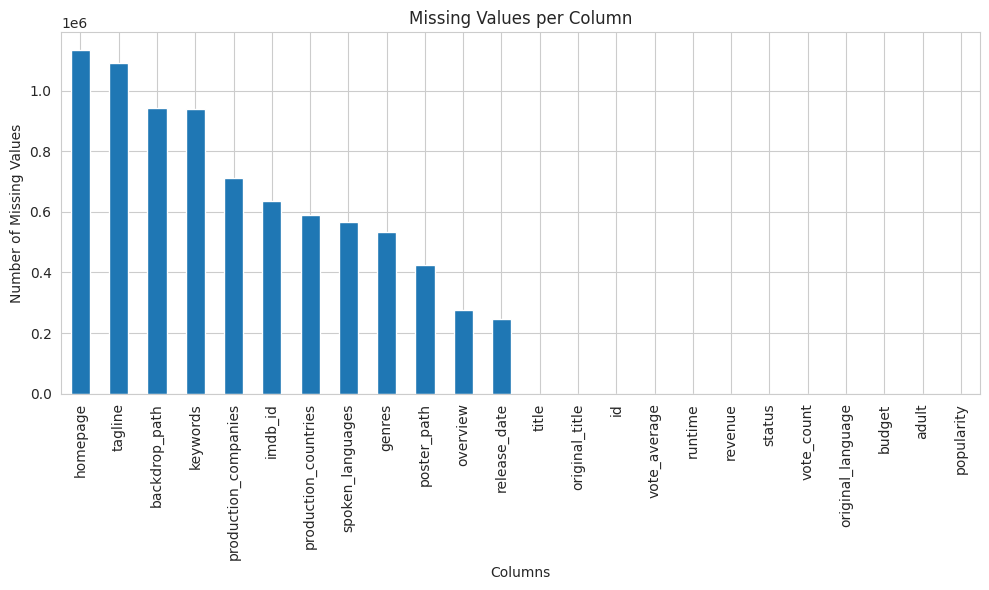

In [12]:
plt.figure(figsize=(10, 6))
missing.plot(kind='bar')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [13]:
columns_to_drop = ['homepage', 'tagline', 'backdrop_path', 'keywords', 'production_companies',
                  'imdb_id', 'production_countries', 'spoken_languages',  'poster_path']

In [14]:
df = df.drop(columns = columns_to_drop)

In [15]:
df.isnull().sum()

,0
id,0
title,13
vote_average,0
vote_count,0
status,0
release_date,245022
revenue,0
runtime,0
adult,0
budget,0


In [16]:
print(df['release_date'].sample(10))
print('\n')
print(df['overview'].sample(10))

974083     1929-07-15
504496     2004-01-01
965477     2011-03-05
899395     2017-04-07
1107706           NaN
31129      2009-06-25
353588     2011-01-01
670550            NaN
458566            NaN
841487     2010-09-04
Name: release_date, dtype: object


1076643                                                  NaN
38407      A 13-year-old girl deals with the issues broug...
786944                                     A Fatal Adventure
719361     A Fantastic Journey through the sights and sou...
418125                                                   NaN
665630     After escaping his creator, MePhone began a se...
369323     Two carers; a disheartened young immigrant and...
421205     A documentary about Irish projectionist Rob O'...
752910     Musician Sahib Shihab begins his day playing f...
140989     Life on the Danube is essentially determined b...
Name: overview, dtype: object


In [17]:

df['overview'] = df['overview'].fillna("No description available")
df['release_date'] = pd.to_datetime(df['release_date'],errors = 'coerce')

In [18]:
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day'] = df['release_date'].dt.day

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268756 entries, 0 to 1268755
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1268756 non-null  int64         
 1   title              1268743 non-null  object        
 2   vote_average       1268756 non-null  float64       
 3   vote_count         1268756 non-null  int64         
 4   status             1268756 non-null  object        
 5   release_date       1023734 non-null  datetime64[ns]
 6   revenue            1268756 non-null  int64         
 7   runtime            1268756 non-null  int64         
 8   adult              1268756 non-null  bool          
 9   budget             1268756 non-null  int64         
 10  original_language  1268756 non-null  object        
 11  original_title     1268743 non-null  object        
 12  overview           1268756 non-null  object        
 13  popularity         1268756 

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import HistGradientBoostingRegressor

# Only use numerical features
features = ['vote_average', 'runtime', 'budget', 'popularity', 'release_year']

data = df[features].copy()

# Use fast GBDT imputer
imputer = IterativeImputer(
    estimator=HistGradientBoostingRegressor(),
    max_iter=10,
    random_state=42,
    n_nearest_features=5,
    skip_complete=True  # Only impute missing
)

imputed = imputer.fit_transform(data)

df['release_year'] = imputed[:, 4]  # Replace release_year
df['release_year'] = df['release_year'].round().astype(int)

# Fill month/day with defaults
df['release_month'] = df['release_month'].fillna(1)
df['release_day'] = df['release_day'].fillna(1)

# Reconstruct date
df['release_date'] = pd.to_datetime(
    df['release_year'].astype(str) + '-' +
    df['release_month'].astype(int).astype(str) + '-' +
    df['release_day'].astype(int).astype(str)
)

In [21]:
df.isnull().sum()

,0
id,0
title,13
vote_average,0
vote_count,0
status,0
release_date,0
revenue,0
runtime,0
adult,0
budget,0


In [22]:
df.drop(columns = 'original_title',inplace = True)


In [23]:
df.sample(3)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,overview,popularity,genres,release_year,release_month,release_day
920347,285402,Ewiger Walzer,0.0,0,Released,1954-08-04,0,0,False,0,de,No description available,0.608,Drama,1954,8.0,4.0
321247,396281,Cinta Tapi Beda,2.5,1,Released,2012-12-27,0,96,False,0,id,Cahyo and Diana are from different religions. ...,0.666,"Drama, Romance",2012,12.0,27.0
222554,191755,Quality Balls: The David Steinberg Story,7.5,2,Released,2013-05-24,0,76,False,0,en,A look at the life and work of Canadian comedy...,1.141,"Comedy, Documentary",2013,5.0,24.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268756 entries, 0 to 1268755
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1268756 non-null  int64         
 1   title              1268743 non-null  object        
 2   vote_average       1268756 non-null  float64       
 3   vote_count         1268756 non-null  int64         
 4   status             1268756 non-null  object        
 5   release_date       1268756 non-null  datetime64[ns]
 6   revenue            1268756 non-null  int64         
 7   runtime            1268756 non-null  int64         
 8   adult              1268756 non-null  bool          
 9   budget             1268756 non-null  int64         
 10  original_language  1268756 non-null  object        
 11  overview           1268756 non-null  object        
 12  popularity         1268756 non-null  float64       
 13  genres             734324 n

In [25]:
df.describe(include='all').T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,1268756.0,NaN,NaN,NaN,815463.664903,2.0,450426.75,825743.5,1202461.25,1527004.0,434410.814386
title,1268743,1082899,Home,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vote_average,1268756.0,NaN,NaN,NaN,1.711101,0.0,0.0,0.0,4.0,10.0,2.942316
vote_count,1268756.0,NaN,NaN,NaN,16.908809,0.0,0.0,0.0,1.0,34495.0,301.526136
status,1268756,6,Released,1231977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_date,1268756,NaN,NaN,NaN,2001-10-08 00:17:50.571804032,1800-01-01 00:00:00,1997-01-01 00:00:00,2010-05-30 00:00:00,2018-05-07 00:00:00,2099-12-31 00:00:00,NaN
revenue,1268756.0,NaN,NaN,NaN,657304.003887,-12.0,0.0,0.0,0.0,4999999999.0,18806937.542272
runtime,1268756.0,NaN,NaN,NaN,45.876514,-28.0,0.0,19.0,87.0,14400.0,61.257005
adult,1268756,2,False,1144188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,1268756.0,NaN,NaN,NaN,253753.893856,0.0,0.0,0.0,0.0,999999999.0,5183322.217889


In [26]:
df


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,overview,popularity,genres,release_year,release_month,release_day
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,en,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure",2010,7.0,15.0
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction",2014,11.0,5.0
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,en,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller",2008,7.0,16.0
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,en,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction",2009,12.0,15.0
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,en,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",2012,4.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268751,797565,Sir-Ayet 2,0.000,0,Released,2019-09-27,0,85,False,0,tr,Two friends rob the grave of a man who was the...,0.600,Horror,2019,9.0,27.0
1268752,797573,Rural Date,0.000,0,Released,2016-01-01,0,21,False,0,en,The film tells a story a womanizer boy meeting...,0.600,"Drama, Romance",2016,1.0,1.0
1268753,797574,Raiders of Yunkang Caves,0.000,0,Released,1984-05-03,0,0,False,0,zh,Mainland film centered around the Buddhist gro...,0.600,NaN,1984,5.0,3.0
1268754,797575,Just Because We're Friends,0.000,0,Released,2019-10-05,0,10,False,0,en,"One night, a young woman initiates sex with he...",0.600,"Romance, Drama",2019,10.0,5.0


In [27]:
import pandas as pd
from ast import literal_eval

# Select only key columns for movie recommendation
key_columns = [
    'id', 'title', 'overview', 'vote_average', 'vote_count',
    'popularity', 'release_date', 'original_language', 'adult', 'genres'
]
df = df[key_columns].copy()

# Parse genres: convert string/JSON → list of names
def parse_genres(x):
    try:
        return [g['name'] for g in literal_eval(x)] if pd.notna(x) else []
    except:
        return []

df['genres'] = df['genres'].astype(str).apply(parse_genres)

In [28]:
# Define genre keywords
genre_keywords = {
    'Action': ['fight', 'war', 'battle', 'agent', 'spy', 'military', 'hero', 'mission'],
    'Comedy': ['funny', 'laugh', 'joke', 'silly', 'humor', 'party'],
    'Romance': ['love', 'relationship', 'couple', 'heart', 'romantic'],
    'Thriller': ['suspense', 'tension', 'killer', 'crime', 'mystery', 'danger'],
    'Horror': ['ghost', 'fear', 'scary', 'zombie', 'demon', 'monster'],
    'Adventure': ['quest', 'treasure', 'explore', 'journey', 'expedition'],
    'Science Fiction': ['spaceship', 'alien', 'robot', 'ai', 'future', 'space'],
    'Fantasy': ['magic', 'wizard', 'dragon', 'elf', 'kingdom', 'spell'],
    'Drama': ['emotional', 'family', 'struggle', 'life', 'serious'],
    'Family': ['kids', 'child', 'disney', 'pixar', 'animation']
}

def predict_genre_from_overview(text):
    if not isinstance(text, str):
        return ['Unknown']
    text = text.lower()
    predicted = []
    for genre, keywords in genre_keywords.items():
        if any(kw in text for kw in keywords):
            predicted.append(genre)
    return predicted if predicted else ['Drama']  # default

# Apply
df['genres_parsed'] = df['overview'].apply(predict_genre_from_overview)

In [29]:
df

,id,title,overview,vote_average,vote_count,popularity,release_date,original_language,adult,genres,genres_parsed
0,27205,Inception,"Cobb, a skilled thief who commits corporate es...",8.364,34495,83.952,2010-07-15,en,False,[],"[Science Fiction, Drama]"
1,157336,Interstellar,The adventures of a group of explorers who mak...,8.417,32571,140.241,2014-11-05,en,False,[],"[Adventure, Science Fiction]"
2,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,8.512,30619,130.643,2008-07-16,en,False,[],"[Action, Comedy, Thriller, Science Fiction]"
3,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",7.573,29815,79.932,2009-12-15,en,False,[],"[Action, Science Fiction]"
4,24428,The Avengers,When an unexpected enemy emerges and threatens...,7.710,29166,98.082,2012-04-25,en,False,[],[Fantasy]
...,...,...,...,...,...,...,...,...,...,...,...
1268751,797565,Sir-Ayet 2,Two friends rob the grave of a man who was the...,0.000,0,0.600,2019-09-27,tr,False,[],[Drama]
1268752,797573,Rural Date,The film tells a story a womanizer boy meeting...,0.000,0,0.600,2016-01-01,en,False,[],[Drama]
1268753,797574,Raiders of Yunkang Caves,Mainland film centered around the Buddhist gro...,0.000,0,0.600,1984-05-03,zh,False,[],[Science Fiction]
1268754,797575,Just Because We're Friends,"One night, a young woman initiates sex with he...",0.000,0,0.600,2019-10-05,en,False,[],[Romance]


In [30]:
# Replace genres with predicted ones
df['genres'] = df['genres_parsed'].apply(lambda x: '|'.join(x) if isinstance(x, list) else 'Unknown')

# Drop temporary column
df = df.drop(columns=['genres_parsed'])

In [31]:
key_columns = [
    'id',
    'title',
    'overview',
    'genres',
    'vote_average',
    'vote_count',
    'popularity',
    'release_date',
    'original_language',
    'adult'
]

df = df[key_columns].copy()

In [32]:
df = df.astype({
    'id': 'int32',
    'title': 'string',
    'overview': 'string',
    'genres': 'string',
    'vote_average': 'float32',
    'vote_count': 'int32',
    'popularity': 'float32',
    'release_date': 'datetime64[ns]',
    'original_language': 'category',
    'adult': 'bool'
})

# Handle any remaining missing in overview
df['overview'] = df['overview'].fillna("No description available")

In [33]:
print("✅ Final Dataset Ready for Movie Recommendation System\n")
print("📊 Shape:", df.shape)
print("\n✅ Data Types:")
print(df.dtypes)
print("\n🧼 Missing Values:")
print(df.isnull().sum())
print("\n🔍 Sample Genres:")
print(df['genres'].value_counts().head(10))

✅ Final Dataset Ready for Movie Recommendation System

📊 Shape: (1268756, 10)

✅ Data Types:
id                            int32
title                string[python]
overview             string[python]
genres               string[python]
vote_average                float32
vote_count                    int32
popularity                  float32
release_date         datetime64[ns]
original_language          category
adult                          bool
dtype: object

🧼 Missing Values:
id                    0
title                13
overview              0
genres                0
vote_average          0
vote_count            0
popularity            0
release_date          0
original_language     0
adult                 0
dtype: int64

🔍 Sample Genres:
genres
Drama                      397295
Science Fiction            395542
Romance                     47211
Action                      38389
Action|Science Fiction      27361
Science Fiction|Drama       25906
Romance|Science Fiction     2379

In [34]:
df = df.drop_duplicates(subset='id',keep = 'first')
title_counts = df['title'].value_counts()
print(f"Movies with same title: {title_counts[title_counts > 1].count()}")
print("Sample remakes:")
print(title_counts[title_counts > 1].head())

Movies with same title: 68836
Sample remakes:
title
Home        172
Untitled    140
Mother      110
Alone       105
The Gift     87
Name: count, dtype: Int64


In [36]:
df = df.dropna()

In [37]:
df.isnull().sum()

,0
id,0
title,0
overview,0
genres,0
vote_average,0
vote_count,0
popularity,0
release_date,0
original_language,0
adult,0


In [39]:
numeric_cols = ['vote_average', 'vote_count',  'popularity']

# Summary stats
print(df[numeric_cols].describe())

       vote_average    vote_count    popularity
count  1.267734e+06  1.267734e+06  1.267734e+06
mean   1.712415e+00  1.692243e+01  1.130012e+00
std    2.951108e+00  3.016473e+02  7.162643e+00
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  6.000000e-01
50%    0.000000e+00  0.000000e+00  6.000000e-01
75%    4.000000e+00  1.000000e+00  8.400000e-01
max    1.000000e+01  3.449500e+04  2.994357e+03


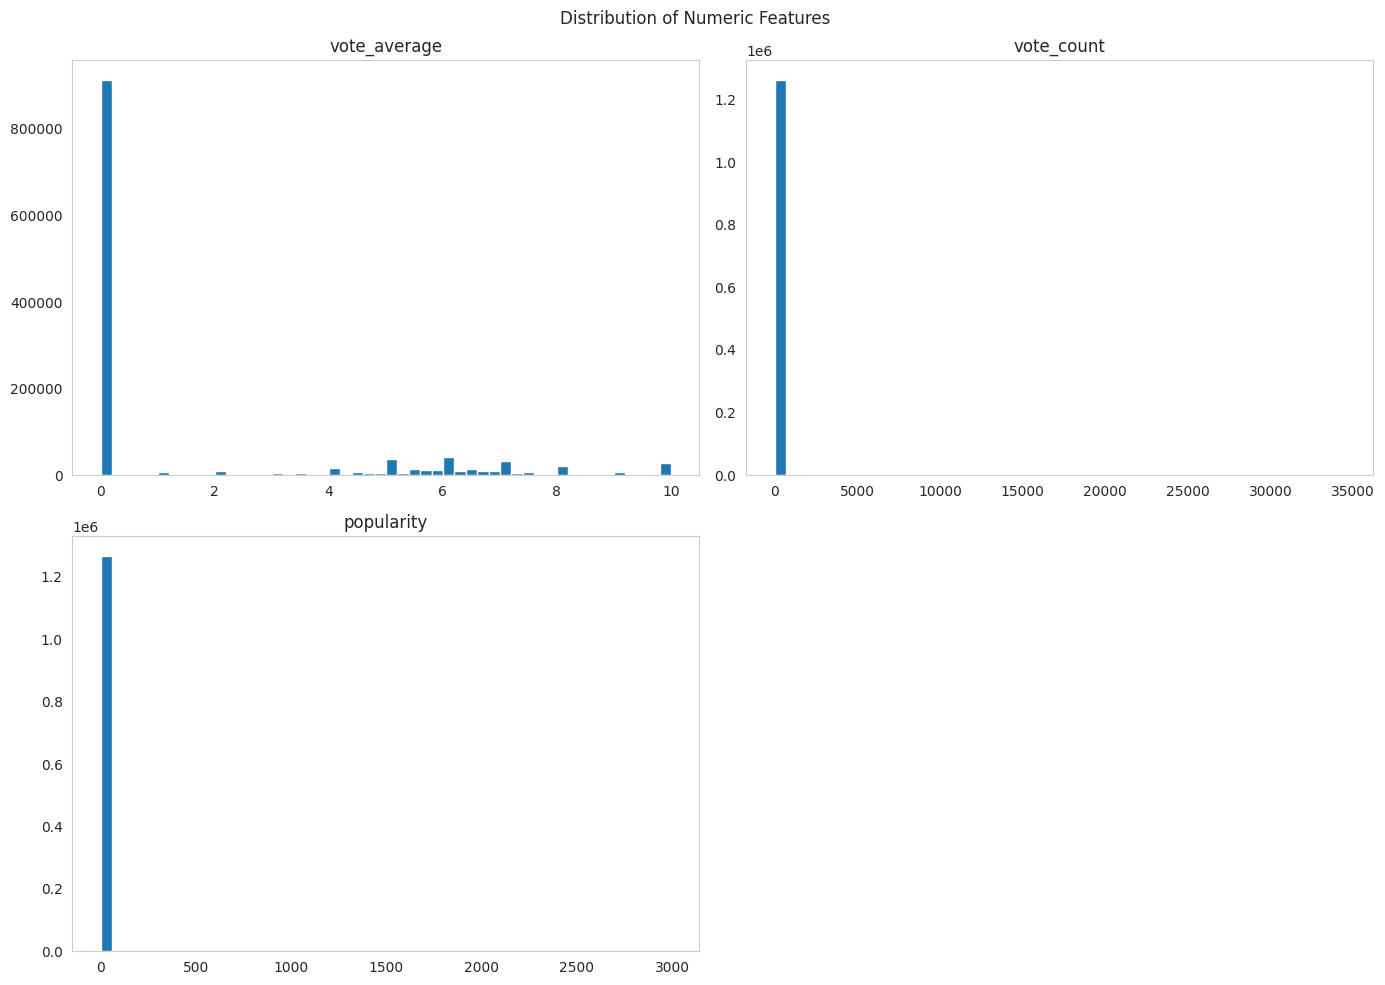

In [40]:
df[numeric_cols].hist(bins=50, figsize=(14, 10), grid=False)
plt.suptitle("Distribution of Numeric Features")
plt.tight_layout()
plt.show()

In [47]:
# Impute missing overviews (already handled in previous steps, but keeping for robustness)
df['overview'] = df['overview'].fillna('No description available')

# Enhance short overviews by combining title and overview
df['combined_text'] = df.apply(
    lambda row: f"{row['title']} {row['overview']}",
    axis=1
)

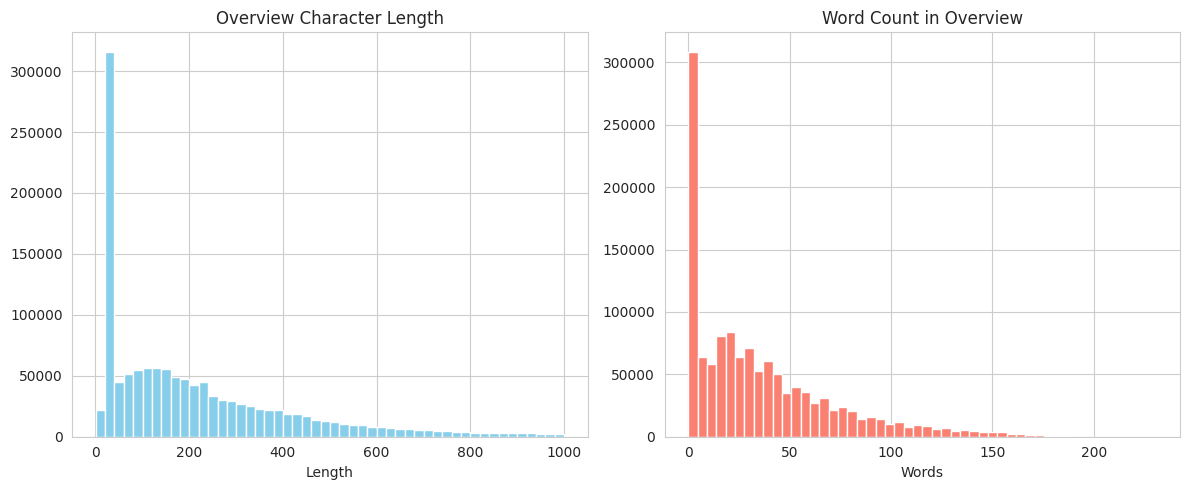

Missing overviews: 0
Empty overviews: 1518


In [41]:
# Overview length
df['overview_length'] = df['overview'].astype(str).str.len()
df['word_count'] = df['overview'].astype(str).str.split().str.len()

# Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['overview_length'].hist(bins=50, color='skyblue')
plt.title("Overview Character Length")
plt.xlabel("Length")

plt.subplot(1, 2, 2)
df['word_count'].hist(bins=50, color='salmon')
plt.title("Word Count in Overview")
plt.xlabel("Words")
plt.tight_layout()
plt.show()

print(f"Missing overviews: {df['overview'].isna().sum()}")
print(f"Empty overviews: {(df['overview'].astype(str).str.len() < 10).sum()}")

In [43]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,1267734.0,NaN,NaN,NaN,815070.135809,2.0,450119.25,825109.5,1201792.75,1527004.0,434352.998451
title,1267734,1082830,Home,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overview,1267734,962585,No description available,275591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genres,1267734,825,Drama,397031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vote_average,1267734.0,NaN,NaN,NaN,1.712415,0.0,0.0,0.0,4.0,10.0,2.951108
vote_count,1267734.0,NaN,NaN,NaN,16.922433,0.0,0.0,0.0,1.0,34495.0,301.64727
popularity,1267734.0,NaN,NaN,NaN,1.130012,0.0,0.6,0.6,0.84,2994.356934,7.162643
release_date,1267734,NaN,NaN,NaN,2001-10-06 00:12:16.326074752,1800-01-01 00:00:00,1997-01-01 00:00:00,2010-05-26 00:00:00,2018-05-08 00:00:00,2099-12-31 00:00:00,NaN
original_language,1267734,177,en,690043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adult,1267734,2,False,1143280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
key_columns = [
    'id',
    'title',
    'overview',
    'genres',
    'vote_average',
    'vote_count',
    'popularity',
    'release_date',
    'original_language',
    'adult'
]

df = df[key_columns].copy()

In [53]:
df.sample(10)

,id,title,overview,genres,vote_average,vote_count,popularity,release_date,original_language,adult
954610,64287,America's Flying Aces: The Blue Angels 50th An...,From their history to their brilliant airshows...,Science Fiction,0.0,0,0.6000,1996-01-01,en,False
366285,1190018,God of Death,The short follows a news crew in Mexico report...,Drama,0.0,0,0.6000,1997-01-01,en,False
465528,1089638,Zwischenmusik,TV short by Eckhart Schmidt,Drama,0.0,0,0.6000,1995-01-01,de,False
589775,1445694,By the Light of the Fire,A Campfire Horror Story from Ancient Rome.,Drama,0.0,0,0.6000,2024-12-01,en,False
521624,1131356,Das Sonnenland Südwest-Afrika,Documentary about Africa.,Drama,0.0,0,0.6000,1926-01-01,de,False
568031,1364035,少年英雄王二小,No description available,Science Fiction,0.0,0,0.6000,1997-01-01,zh,False
475372,1519059,Perspectives Vénitiennes,An arrival by train in Venice and sightseeings...,Science Fiction,0.0,0,0.0071,2016-01-01,en,False
894515,594982,Exposure,Exposure is a new Killergram Platinum series t...,Thriller|Science Fiction,0.0,0,0.8440,2013-01-01,en,True
941030,301335,Portraits of Inspiring Lives with Jack Canfield,Jack Canfield made publishing history by telli...,Drama,0.0,0,0.6000,2011-01-01,en,False
1028206,370965,Urf Professor,Chaos follows after a hit-man's car and winnin...,Drama,0.0,0,0.8410,2001-12-04,hi,False


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1267734 entries, 0 to 1268755
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1267734 non-null  int32         
 1   title              1267734 non-null  string        
 2   overview           1267734 non-null  string        
 3   genres             1267734 non-null  string        
 4   vote_average       1267734 non-null  float32       
 5   vote_count         1267734 non-null  int32         
 6   popularity         1267734 non-null  float32       
 7   release_date       1267734 non-null  datetime64[ns]
 8   original_language  1267734 non-null  category      
 9   adult              1267734 non-null  bool          
dtypes: bool(1), category(1), datetime64[ns](1), float32(2), int32(2), string(3)
memory usage: 71.3 MB


In [55]:
# Parameters
C = df['vote_average'].mean()  # Average rating across all movies
m = df['vote_count'].quantile(0.8)  # Minimum votes to be considered

# Weighted rating formula
df['weighted_rating'] = (
    (df['vote_count'] / (df['vote_count'] + m)) * df['vote_average'] +
    (m / (df['vote_count'] + m)) * C
)

In [56]:
from datetime import datetime
current_year = datetime.now().year
df['movie_age'] = current_year - df['release_date'].dt.year

In [57]:
df['genre_count'] = df['genres'].apply(lambda x: len(x.split('|')) if isinstance(x, str) else 0)

In [58]:
df['overview_length'] = df['overview'].astype(str).str.len()
df['word_count'] = df['overview'].astype(str).str.split().str.len()

In [59]:
# Combine title, overview, tagline (if available)
df['combined_text'] = df['title'] + " " + df['overview']
if 'tagline' in df.columns:
    df['combined_text'] += " " + df['tagline'].fillna("")

In [60]:
df['era'] = (df['release_date'].dt.year // 10) * 10  # e.g., 1980, 1990, 2000
df['era'] = df['era'].astype('category')

In [61]:
df['is_cold_start'] = (
    (df['vote_count'] < 10) |
    (df['overview'].str.len() < 10) |
    (df['genre_count'] == 0)
)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1267734 entries, 0 to 1268755
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1267734 non-null  int32         
 1   title              1267734 non-null  string        
 2   overview           1267734 non-null  string        
 3   genres             1267734 non-null  string        
 4   vote_average       1267734 non-null  float32       
 5   vote_count         1267734 non-null  int32         
 6   popularity         1267734 non-null  float32       
 7   release_date       1267734 non-null  datetime64[ns]
 8   original_language  1267734 non-null  category      
 9   adult              1267734 non-null  bool          
 10  weighted_rating    1267734 non-null  float64       
 11  movie_age          1267734 non-null  int64         
 12  genre_count        1267734 non-null  int64         
 13  overview_length    1267734 non-n

In [63]:
df

,id,title,overview,genres,vote_average,vote_count,popularity,release_date,original_language,adult,weighted_rating,movie_age,genre_count,overview_length,word_count,combined_text,era,is_cold_start
0,27205,Inception,"Cobb, a skilled thief who commits corporate es...",Science Fiction|Drama,8.364,34495,83.952003,2010-07-15,en,False,8.363807,15,2,280,44,"Inception Cobb, a skilled thief who commits co...",2010,False
1,157336,Interstellar,The adventures of a group of explorers who mak...,Adventure|Science Fiction,8.417,32571,140.240997,2014-11-05,en,False,8.416794,11,2,198,33,Interstellar The adventures of a group of expl...,2010,False
2,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,Action|Comedy|Thriller|Science Fiction,8.512,30619,130.643005,2008-07-16,en,False,8.511778,17,4,396,67,The Dark Knight Batman raises the stakes in hi...,2000,False
3,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action|Science Fiction,7.573,29815,79.931999,2009-12-15,en,False,7.572803,16,2,175,28,"Avatar In the 22nd century, a paraplegic Marin...",2000,False
4,24428,The Avengers,When an unexpected enemy emerges and threatens...,Fantasy,7.710,29166,98.082001,2012-04-25,en,False,7.709794,13,1,297,47,The Avengers When an unexpected enemy emerges ...,2010,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268751,797565,Sir-Ayet 2,Two friends rob the grave of a man who was the...,Drama,0.000,0,0.600000,2019-09-27,tr,False,1.712415,6,1,73,16,Sir-Ayet 2 Two friends rob the grave of a man ...,2010,True
1268752,797573,Rural Date,The film tells a story a womanizer boy meeting...,Drama,0.000,0,0.600000,2016-01-01,en,False,1.712415,9,1,149,28,Rural Date The film tells a story a womanizer ...,2010,True
1268753,797574,Raiders of Yunkang Caves,Mainland film centered around the Buddhist gro...,Science Fiction,0.000,0,0.600000,1984-05-03,zh,False,1.712415,41,1,61,9,Raiders of Yunkang Caves Mainland film centere...,1980,True
1268754,797575,Just Because We're Friends,"One night, a young woman initiates sex with he...",Romance,0.000,0,0.600000,2019-10-05,en,False,1.712415,6,1,231,40,"Just Because We're Friends One night, a young ...",2010,True


In [64]:
key_columns = [
    'id',
    'title',
    'overview',
    'genres',
    'vote_average',
    'vote_count',
    'popularity',
    'release_date',
    'weighted_rating',
    'genre_count',
    'combined_text'
]

optional_columns = [
    'original_language',
    'adult',
    'movie_age',
    'era',
    'is_cold_start'
]

final_columns = key_columns + optional_columns
df = df[final_columns].copy()


In [65]:
df = df.astype({
    'id': 'int32',
    'title': 'string',
    'overview': 'string',
    'genres': 'string',
    'vote_average': 'float32',
    'vote_count': 'int32',
    'popularity': 'float32',
    'release_date': 'datetime64[ns]',
    'weighted_rating': 'float32',
    'genre_count': 'int8',
    'combined_text': 'string',
    'original_language': 'category',
    'adult': 'bool',
    'movie_age': 'int16',
    'era': 'category',
    'is_cold_start': 'bool'
})


In [67]:
df.sample(10)

,id,title,overview,genres,vote_average,vote_count,popularity,release_date,weighted_rating,genre_count,combined_text,original_language,adult,movie_age,era,is_cold_start
154336,346257,Le Fantôme de Longstaff,Wonderful short by Moullet based on a Henry Ja...,Drama,5.7,3,0.600,1996-08-08,4.703104,1,Le Fantôme de Longstaff Wonderful short by Mou...,en,False,29,1990,True
914887,608670,"He is Bold and He is Racist, He is Gay and He ...",Documentary montage on the theme of skinheads ...,Science Fiction,0.0,0,0.600,1994-11-24,1.712415,1,"He is Bold and He is Racist, He is Gay and He ...",en,False,31,1990,True
293643,1062748,America's Wild Border: Northern Exposure,America's northern border with Canada shows a ...,Drama,8.0,1,1.400,2020-06-15,4.856208,1,America's Wild Border: Northern Exposure Ameri...,en,False,5,2020,True
805007,545899,Acid Girls,Every man's dream becomes every man's nightmar...,Drama,0.0,0,0.600,2014-07-04,1.712415,1,Acid Girls Every man's dream becomes every man...,en,False,11,2010,True
887626,653362,Tous Les Jours,"In rocky Newfoundland, renowned French artist ...",Science Fiction,0.0,0,0.600,2019-11-16,1.712415,1,"Tous Les Jours In rocky Newfoundland, renowned...",en,False,6,2010,True
1214712,834304,Il Libro Della Giungla. Odio e Amore,A newborn baby who survived an accident in the...,Romance|Drama|Family,0.0,0,0.600,1990-01-01,1.712415,3,Il Libro Della Giungla. Odio e Amore A newborn...,it,False,35,1990,True
302895,748635,Matthew Bourne's The Red Shoes,"The Red Shoes is a tale of obsession, possessi...",Action|Romance|Fantasy,7.0,1,1.239,2020-09-30,4.356208,3,Matthew Bourne's The Red Shoes The Red Shoes i...,en,False,5,2020,True
233878,1386818,14 Vezes,"The different ways to have fun, before the ten...",Thriller,10.0,1,0.703,2022-08-29,5.856208,1,"14 Vezes The different ways to have fun, befo...",pt,False,3,2020,True
471422,1091094,OX-EYE-FIELDS,A man unravels the consequences of reaching th...,Drama,0.0,0,0.600,2022-05-06,1.712415,1,OX-EYE-FIELDS A man unravels the consequences ...,pt,False,3,2020,True
1133037,950409,"Beira, Touristic Port of Mozambique","On a very cheerful pop music, this film praise...",Action|Science Fiction|Drama,0.0,0,0.600,1973-01-01,1.712415,3,"Beira, Touristic Port of Mozambique On a very ...",pt,False,52,1970,True


In [69]:
df.to_parquet('moviesclean.parquet',index = False)


In [71]:
df = pd.read_parquet('/content/moviesclean.parquet')

In [72]:
df

,id,title,overview,genres,vote_average,vote_count,popularity,release_date,weighted_rating,genre_count,combined_text,original_language,adult,movie_age,era,is_cold_start
0,27205,Inception,"Cobb, a skilled thief who commits corporate es...",Science Fiction|Drama,8.364,34495,83.952003,2010-07-15,8.363808,2,"Inception Cobb, a skilled thief who commits co...",en,False,15,2010,False
1,157336,Interstellar,The adventures of a group of explorers who mak...,Adventure|Science Fiction,8.417,32571,140.240997,2014-11-05,8.416794,2,Interstellar The adventures of a group of expl...,en,False,11,2010,False
2,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,Action|Comedy|Thriller|Science Fiction,8.512,30619,130.643005,2008-07-16,8.511778,4,The Dark Knight Batman raises the stakes in hi...,en,False,17,2000,False
3,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action|Science Fiction,7.573,29815,79.931999,2009-12-15,7.572803,2,"Avatar In the 22nd century, a paraplegic Marin...",en,False,16,2000,False
4,24428,The Avengers,When an unexpected enemy emerges and threatens...,Fantasy,7.710,29166,98.082001,2012-04-25,7.709795,1,The Avengers When an unexpected enemy emerges ...,en,False,13,2010,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267729,797565,Sir-Ayet 2,Two friends rob the grave of a man who was the...,Drama,0.000,0,0.600000,2019-09-27,1.712415,1,Sir-Ayet 2 Two friends rob the grave of a man ...,tr,False,6,2010,True
1267730,797573,Rural Date,The film tells a story a womanizer boy meeting...,Drama,0.000,0,0.600000,2016-01-01,1.712415,1,Rural Date The film tells a story a womanizer ...,en,False,9,2010,True
1267731,797574,Raiders of Yunkang Caves,Mainland film centered around the Buddhist gro...,Science Fiction,0.000,0,0.600000,1984-05-03,1.712415,1,Raiders of Yunkang Caves Mainland film centere...,zh,False,41,1980,True
1267732,797575,Just Because We're Friends,"One night, a young woman initiates sex with he...",Romance,0.000,0,0.600000,2019-10-05,1.712415,1,"Just Because We're Friends One night, a young ...",en,False,6,2010,True
